visulize encoded reviews

In [1]:
import pickle
import os
import torch
import numpy as np
from torch.utils.data import DataLoader

is_testset = False
model_name = 'encoder.pth'
print(model_name)

# 2. set the seed and GPU
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
set_seed(42)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
os.environ["CUBLAS_WORKSPACE_CONFIG"]=":4096:2"

device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda")
print("Using device", device)

# 3. dataset
# --- serialization ---
print("  serialization...")

filename = 'dataset.pl'

outfile = open(filename,'rb')
dataset = pickle.load(outfile)
outfile.close()

filename = 'vocab.pl'
outfile = open(filename,'rb')
vocab = pickle.load(outfile)
outfile.close()

filename = 'category.pl'
outfile = open(filename,'rb')
category = pickle.load(outfile)
outfile.close()

dataloader = DataLoader(dataset, batch_size=100, drop_last=True)

# loading trained model
model = torch.load(f'{model_name}')       # pretrained encoder
encoder = model.module.encoder.to(device)
# encoder = nn.DataParallel(encoder.to(device))

results = []
ylist = []
with torch.no_grad():
    for x, y, s in dataloader:
        enc, _ = encoder(x.to(device), s)
        results.append(enc)
        ylist.append(y)

X = torch.cat(results, dim=0).cpu().numpy()
y = torch.cat(ylist).cpu().numpy()

print(X.shape)
print(y.shape)

import matplotlib.pyplot as plt
colors = ["navy", "turquoise", "darkorange", "sienna", "lawngreen", "dodgerblue", "pink", "crimson", "orchid", "yellow"]
print('Done!')

encoder.pth
Using device cuda
  serialization...
(99900, 100)
(99900,)
Done!


t-sne...
X_r shape: (99900, 2)


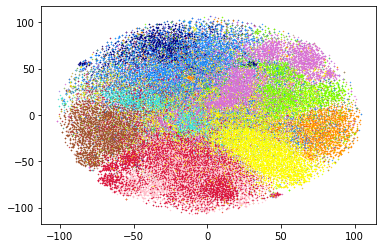

In [2]:
#visulization using t-sne
print('t-sne...')
from sklearn.manifold import TSNE
X_r = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
print(f'X_r shape: {X_r.shape}')

plt.rcParams['figure.dpi'] = 80
plt.figure()
for color, i in zip(colors, range(10)):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=colors[i], alpha=0.8, s=0.1
    )
# plt.title(f'{mname}- {index}')
plt.show()
